In [14]:
from datasets import load_dataset, load_from_disk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datasets_path = "/data/users/zhangjunlei/tyx/reward-by-prm800k/datasets/sft-encoded-datasets-context"

In [5]:
lmdatasets = load_from_disk(datasets_path)

In [9]:
print(lmdatasets)
input_ids_list = lmdatasets["train"]["input_ids"]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'attention_mask'],
        num_rows: 87012
    })
})


In [11]:
print(input_ids_list[0])
print(len(input_ids_list[0]))

tensor([    1,  1108, 29901,  1128,  1784,  6923,   526,   297, 29871, 29955,
        29889, 29947,  6233, 29973,    13,  2929,   918, 29901,    13, 29955,
        29889, 29947,  6233,   338,   278,  1021,   408, 29871, 29955,  6233,
          322, 29871, 29900, 29889, 29947,  6233, 29889, 21700, 29901,  6374,
           13,  7341, 29892,   322,  1951,   727,   526, 29871, 29953, 29900,
         6923,   297,   263, 11015, 29892,   769,   727,   526, 29871, 29953,
        29900,   334, 29871, 29955,   353, 29871, 29946, 29906, 29900,  6923,
          297, 29871, 29955,  6233, 29889, 21700, 29901,  6374,    13,  2855,
         1951,   727,   526, 29871, 29953, 29900,  6923,   297,   263, 11015,
        29892,   769,   727,   526, 29871, 29953, 29900,   334, 29871, 29900,
        29889, 29947,   353, 29871, 29946, 29947,  6923,   297, 29871, 29900,
        29889, 29947,  6233, 29889, 21700, 29901,  6374,    13,  6295, 29892,
          297,  3001, 29892,   727,   526, 29871, 29946, 29906, 

In [12]:
max_len_input_ids = max([len(input_ids) for input_ids in input_ids_list])
print("max_len_input_ids: ", max_len_input_ids)

max_len_input_ids:  3797


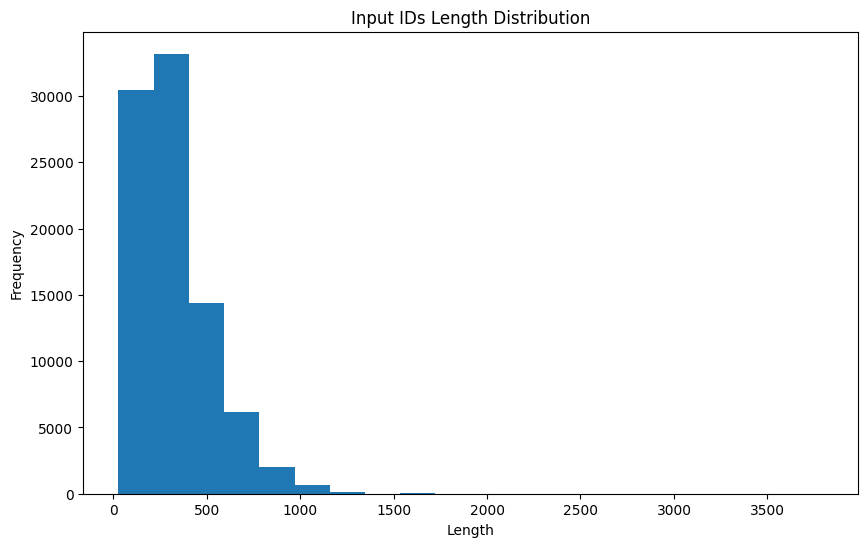

In [15]:
input_ids_len_list = [len(input_ids) for input_ids in input_ids_list]
heights = np.array(input_ids_len_list)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(heights, bins=20)
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_title('Input IDs Length Distribution')
plt.show()

In [18]:
def count_above_upper_bound(len_list, upper_bound):
    count = len([length for length in input_ids_len_list if length > upper_bound])
    print(f'The number of input_ids with length greater than {upper_bound} is:', count)
    return count
count_above_upper_bound(input_ids_len_list, 1024)
count_above_upper_bound(input_ids_len_list, 1536)
count_above_upper_bound(input_ids_len_list, 2048)


The number of input_ids with length greater than 1024 is: 559
The number of input_ids with length greater than 1536 is: 45
The number of input_ids with length greater than 2048 is: 9


9